# To Perform Web Scraping from multiple pages of the website and create final dataset to perform Modelling part

In [5]:
#Import the libraries
import requests
from bs4 import BeautifulSoup
#as we will be scrapping from multiple pages one by one we need to add time delay and also make 
#output cleared for every page to make easily understandable to the user

In [6]:
import time,random
#to add time delay we have sleep()
for i in range(5):
    time.sleep(1) #used generally in OTP generation
    print(random.randint(1000,8000))

3923
3568
5584
3046
5614


In [17]:
#import IPython
from IPython.display import clear_output #to clear output on the display
import re

In [51]:
#Now first let us createempty lists to store the data
Rooms=[];Bathrooms=[];Status=[];Facing=[]
Price=[];Location=[];Area=[];Type=[];
property_types=['Apartment',
'Builder Floor',
'Villa',
'Residential Plot',
'Independent House',
'Studio Apartment']
#now we will perform iteration over all pages in the website
#we will include multiple filters in the url of the webpage
for i in range(1,52):
    base_url=f"https://www.makaan.com/vijayawada-residential-property/buy-property-in-vijayawada-city?propertyType=apartment,builder-floor,villa,residential-plot,independent-house,studio-apartment&page={i}"
    print(f'Scraping from page{i}')
    #we will use clear_output to change the pagenumber
    clear_output(wait=True)
   # time.sleep(2)

    #we will connect to the webpage
    d=requests.get(base_url)
    soup = BeautifulSoup(d.text)
    #First let us extract the number of rooms part from th e property name information
    a = soup.find_all('a',attrs={'class':'typelink'})
    for i in a:
        i=i.span.text
        i=i.replace('Residential Plot','0').replace(' ','')
       
        #now we will append the data to Roomslist
        
        Rooms.append(i)
    #rmng all 7 fill it here Bathrooms,price ,status,facing,area,location,ptype
    h=soup.find_all('ul',{'class':'listing-details'})
    for i in h:
        i=i.text
        bc=re.findall(r'(\d+) Bathrooms',i)
        if(bc):
            Bathrooms.append(int(bc[0]))
        else:
            Bathrooms.append(0)
    for i in h:
        i=i.text
        face=re.findall(r'(East|West|North|South|NorthEast|NorthWest|SouthEast|SouthWest) facing',i)
        if(face):
            Facing.append(face[0])
        else:
            Facing.append('Unknown')
    price=soup.find_all('td',{'class':'price'})
    prices=[i.text.strip() for i in price]
    for i in range(len(prices)):
        if prices[i].find('Cr')!=-1:
            x=''
            for j in prices[i]:
                if j==' ':
                    break
                if j=='.':
                    continue
                else:
                    x+=j
            if(len(x)==2):
                x+='0' 
            if(len(x)==1):
                x+='00'
            x+=' L'
            prices[i]=x
    for i in range(len(prices)):
        k = prices[i].replace(" L","")
        prices[i]=float(k)
    for i in prices:
        Price.append(i)
    area=soup.find_all('span',{'itemprop':'addressLocality'})
    areas=[i.text.strip() for i in area]
    for i in areas:
        Location.append(i)
    x=soup.find_all('td',{'class':'val'})
    status = [i.text for i in x]
    for i in status:
        Status.append(i)
    sqf=soup.find_all('td',{'class':'lbl rate'})
    sqfs=[i.text.strip() for i in sqf]
    for i in sqfs:
        Area.append(i)
    pro_type=[]
    g=soup.find_all('div',{'class':'title-line'})
    names = [i.text for i in g]
    for i in names:
        f=False
        for j in property_types:
            if j in i:
                pro_type.append(j)
                f=True
                break
        if f==False:
            pro_type.append('Independent Floor')
    for i in pro_type:
        Type.append(i)

    
        
    
    
    
        
    

Scraping from page51


In [52]:
print(len(Type))
print(len(Rooms))
print(len(Bathrooms))
print(len(Area))
print(len(Status))

print(len(Location))
print(len(Facing))
print(len(Price))

1008
1008
1008
1008
1008
1008
1008
1008


In [53]:
#One thing to observe you nedd to make sure have a proper Internet Connection
#Creating dataframe
import pandas as pd
data = pd.DataFrame({
'Property_type':Type,
'Areas':Location,
'Price in Lakhs':Price,
'Bathrooms':Bathrooms,
'Face':Facing,
'Square Feet':Area,
'Status':Status,
'Bedrooms':Rooms})
data

,Property_type,Areas,Price in Lakhs,Bathrooms,Face,Square Feet,Status,Bedrooms
0,Apartment,Penamaluru,108.00,0,Unknown,"5,000 / sq ft",Ready to move,3
1,Apartment,Gannavaram,28.00,0,Unknown,"2,500 / sq ft",Ready to move,2
2,Apartment,Penamaluru,90.51,0,Unknown,"4,499 / sq ft",Ready to move,3
3,Apartment,Gannavaram,28.00,0,Unknown,"2,500 / sq ft",Ready to move,2
4,Apartment,Penamaluru,100.00,0,Unknown,"5,000 / sq ft",Ready to move,3
...,...,...,...,...,...,...,...,...
1003,Residential Plot,Auto Nagar,85.80,0,West,"4,205 / sq ft",Resale,0
1004,Residential Plot,Auto Nagar,85.80,0,West,"4,205 / sq ft",Resale,0
1005,Residential Plot,Vidhyadharpuram,120.00,0,NorthWest,"6,410 / sq ft",Resale,0
1006,Residential Plot,Edupugallu,35.00,0,East,"2,125 / sq ft",Resale,0


In [45]:
!pip install openpyxl



   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   ------ -------------------------------- 41.0/250.9 kB 991.0 kB/s eta 0:00:01
   -------------- ------------------------- 92.2/250.9 kB 1.1 MB/s eta 0:00:01
   --------------------------- ------------ 174.1/250.9 kB 1.2 MB/s eta 0:00:01
   ------------------------------- -------- 194.6/250.9 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 250.9/250.9 kB 1.0 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [56]:
#file_name='BuildingsData.xlsx'
#data.to_excel(file_name)
data.to_csv('Building.csv')

In [57]:
df=pd.read_csv('House.csv') #reading file

In [58]:
df

,Unnamed: 0,Bedrooms,Bathrooms,Status,Size,Location,Price,Facing,Type
0,0,3.0,0.0,Ready to move,2161.0,Penamaluru,108.00,NaN,Apartment
1,1,2.0,0.0,Ready to move,1120.0,Gannavaram,28.00,NaN,Apartment
2,2,3.0,0.0,Ready to move,2012.0,Penamaluru,90.51,NaN,Apartment
3,3,2.0,0.0,Ready to move,1120.0,Gannavaram,28.00,NaN,Apartment
4,4,3.0,0.0,Ready to move,2014.0,Penamaluru,100.00,NaN,Apartment
...,...,...,...,...,...,...,...,...,...
1008,1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Residential Plot
1009,1009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Residential Plot
1010,1010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Residential Plot
1011,1011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Residential Plot


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1013 non-null   int64  
 1   Bedrooms    1008 non-null   float64
 2   Bathrooms   1008 non-null   float64
 3   Status      1008 non-null   object 
 4   Size        1008 non-null   float64
 5   Location    1008 non-null   object 
 6   Price       1008 non-null   float64
 7   Facing      626 non-null    object 
 8   Type        1013 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 71.4+ KB


In [60]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [61]:
df

,Bedrooms,Bathrooms,Status,Size,Location,Price,Facing,Type
0,3.0,0.0,Ready to move,2161.0,Penamaluru,108.00,NaN,Apartment
1,2.0,0.0,Ready to move,1120.0,Gannavaram,28.00,NaN,Apartment
2,3.0,0.0,Ready to move,2012.0,Penamaluru,90.51,NaN,Apartment
3,2.0,0.0,Ready to move,1120.0,Gannavaram,28.00,NaN,Apartment
4,3.0,0.0,Ready to move,2014.0,Penamaluru,100.00,NaN,Apartment
...,...,...,...,...,...,...,...,...
1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Residential Plot
1009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Residential Plot
1010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Residential Plot
1011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Residential Plot


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Bedrooms   1008 non-null   float64
 1   Bathrooms  1008 non-null   float64
 2   Status     1008 non-null   object 
 3   Size       1008 non-null   float64
 4   Location   1008 non-null   object 
 5   Price      1008 non-null   float64
 6   Facing     626 non-null    object 
 7   Type       1013 non-null   object 
dtypes: float64(4), object(4)
memory usage: 63.4+ KB


In [63]:
#check the unique values in it
df['Status'].unique()

array(['Ready to move', 'Under Construction', 'Resale', 'New', nan],
      dtype=object)

In [64]:
df['Facing'].fillna("NoFacing",inplace=True)

C:\Users\abc\AppData\Local\Temp\ipykernel_12328\1674438036.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Facing'].fillna("NoFacing",inplace=True)


In [65]:
df['Bedrooms'].fillna(0,inplace=True)

C:\Users\abc\AppData\Local\Temp\ipykernel_12328\458492895.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Bedrooms'].fillna(0,inplace=True)


In [66]:
df['Facing'].unique()

array(['NoFacing', 'East', 'NorthEast', 'West', 'NorthWest', 'North',
       'SouthEast', 'South', 'SouthWest'], dtype=object)

In [67]:
df['Bathrooms'].fillna(0,inplace=True)

C:\Users\abc\AppData\Local\Temp\ipykernel_12328\1254444734.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Bathrooms'].fillna(0,inplace=True)


In [68]:
df['Status'].fillna('NotKnown',inplace=True)

C:\Users\abc\AppData\Local\Temp\ipykernel_12328\3642455981.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Status'].fillna('NotKnown',inplace=True)


In [69]:
df['Size'].fillna(0,inplace=True)

C:\Users\abc\AppData\Local\Temp\ipykernel_12328\317372114.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Size'].fillna(0,inplace=True)


In [70]:
df['Location'].fillna("NotKnown",inplace=True)

C:\Users\abc\AppData\Local\Temp\ipykernel_12328\3098811857.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Location'].fillna("NotKnown",inplace=True)


In [71]:
df['Price'].fillna(0,inplace=True)

C:\Users\abc\AppData\Local\Temp\ipykernel_12328\2383045612.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Price'].fillna(0,inplace=True)


In [72]:
df['Type'].fillna('NotKnown',inplace=True)

C:\Users\abc\AppData\Local\Temp\ipykernel_12328\4263446347.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Type'].fillna('NotKnown',inplace=True)


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Bedrooms   1013 non-null   float64
 1   Bathrooms  1013 non-null   float64
 2   Status     1013 non-null   object 
 3   Size       1013 non-null   float64
 4   Location   1013 non-null   object 
 5   Price      1013 non-null   float64
 6   Facing     1013 non-null   object 
 7   Type       1013 non-null   object 
dtypes: float64(4), object(4)
memory usage: 63.4+ KB


In [87]:
df.loc[df['Bathrooms'] > 5.0, 'Bathrooms'] = 0.0


In [75]:
df


,Bedrooms,Bathrooms,Status,Size,Location,Price,Facing,Type
0,3.0,0.0,Ready to move,2161.0,Penamaluru,108.00,NoFacing,Apartment
1,2.0,0.0,Ready to move,1120.0,Gannavaram,28.00,NoFacing,Apartment
2,3.0,0.0,Ready to move,2012.0,Penamaluru,90.51,NoFacing,Apartment
3,2.0,0.0,Ready to move,1120.0,Gannavaram,28.00,NoFacing,Apartment
4,3.0,0.0,Ready to move,2014.0,Penamaluru,100.00,NoFacing,Apartment
...,...,...,...,...,...,...,...,...
1008,0.0,0.0,NotKnown,0.0,NotKnown,0.00,NoFacing,Residential Plot
1009,0.0,0.0,NotKnown,0.0,NotKnown,0.00,NoFacing,Residential Plot
1010,0.0,0.0,NotKnown,0.0,NotKnown,0.00,NoFacing,Residential Plot
1011,0.0,0.0,NotKnown,0.0,NotKnown,0.00,NoFacing,Residential Plot


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Bedrooms   1013 non-null   float64
 1   Bathrooms  1013 non-null   float64
 2   Status     1013 non-null   object 
 3   Size       1013 non-null   float64
 4   Location   1013 non-null   object 
 5   Price      1013 non-null   float64
 6   Facing     1013 non-null   object 
 7   Type       1013 non-null   object 
dtypes: float64(4), object(4)
memory usage: 63.4+ KB


In [90]:
df['Bedrooms'].unique()

array([3., 2., 5., 4., 0., 8., 1.])

In [95]:
df['Type'].unique()

array(['Apartment', 'Independent House', 'Residential Plot', 'Villa',
       'Independent Floor', 'Studio Apartment'], dtype=object)

In [96]:
df['Status'].unique()

array(['Ready to move', 'Under Construction', 'Resale', 'New', 'NotKnown'],
      dtype=object)

In [97]:
df['Facing'].unique()

array(['NoFacing', 'East', 'NorthEast', 'West', 'NorthWest', 'North',
       'SouthEast', 'South', 'SouthWest'], dtype=object)

 4 Steps we need to follow in AI Project CheckList
--> Planning (Gather data from multiple sources --->Kaggle,UCI,Hugging Face,RoboFlow Web Scraping) Data from offline Sources
--> Data Preparation --> Data Cleansing,Data Transformation,Data Wrangling,Data Visualization,pandas, Visualization libraries[Plotly]
--> Modelling --> sklearn,Tensorflow/keras/NLTK Model Creation,Model Validation,Model Evaluation
-->Presentation --> EndUser --> Building a web service [Flask/Django,Streamlit]
                            -->HTML, CSS + Flask -->Github --> Pythonanywhere / AWS
                            -->No Frontend [Streamlit] --> Streamlit WebApp
                            -->Mobile App --> MIT AppInventor
                            

In [98]:
!pip install scikit-learn

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------------------------- ------------ 41.0/60.8 kB 960.0 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 802.2 kB/s eta 0:00:00
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.9 MB 3.3 MB/s eta 0:00:04
   - -------------------------------------- 0.3/10.9 MB 4.3 MB/s eta 0:00:03
   -- ------------------------------------- 0.6/10.9 MB 4.5 MB/s eta 0:00:03
   ---- ----------------------------------- 1.3/10.9 MB 8.2 MB/s eta 0:00:02
   --------- ------------------------------ 2.5/10.9 MB 11.6 MB/s eta 0:00:01
   ------------ --------------------------- 3.4/10.9 MB 12.9 MB/s eta 0:00:01
   ------------ --------------------------- 3.4/10.9 MB 12.9 MB/s eta 0:00:01
   ---------------- ----------------------- 4.6/10.9 MB 12.2 MB/s eta 0:00:01
   -------------------- ------------------- 5.6/10.9 MB 13.2 MB/s eta 0:00:01



[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [99]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [100]:
#To convert categorical data into numerical data
label = LabelEncoder()
label

LabelEncoder()

In [101]:
df['Status'] = label.fit_transform(df['Status'])
df['Status']

0       2
1       2
2       2
3       2
4       2
       ..
1008    1
1009    1
1010    1
1011    1
1012    1
Name: Status, Length: 1013, dtype: int64

In [102]:
#We wanted to understand for which category numeric is assigned (Alphabetical
names = ['Saketh','Eswar','Sandeep','Codegnan']
marks = [85,86,78,98]
#we want to create a dictionary
data = dict(zip(names,marks))
data

{'Saketh': 85, 'Eswar': 86, 'Sandeep': 78, 'Codegnan': 98}

In [104]:
#Now let us use above principle to fetch both labels and classes
encoded_to_original = dict(zip(label.transform(label.classes_),label.classes_))
encoded_to_original

{np.int64(0): 'New',
 np.int64(1): 'NotKnown',
 np.int64(2): 'Ready to move',
 np.int64(3): 'Resale',
 np.int64(4): 'Under Construction'}

In [103]:
label

LabelEncoder()

In [105]:
#Finish for Location, Type , Facing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Bedrooms   1013 non-null   float64
 1   Bathrooms  1013 non-null   float64
 2   Status     1013 non-null   int64  
 3   Size       1013 non-null   float64
 4   Location   1013 non-null   object 
 5   Price      1013 non-null   float64
 6   Facing     1013 non-null   object 
 7   Type       1013 non-null   object 
dtypes: float64(4), int64(1), object(3)
memory usage: 63.4+ KB


In [108]:
df['Location'] = label.fit_transform(df['Location'])

df['Type'] = label.fit_transform(df['Type'])
df['Facing'] = label.fit_transform(df['Facing'])

In [109]:
df

,Bedrooms,Bathrooms,Status,Size,Location,Price,Facing,Type
0,3.0,0.0,2,2161.0,48,108.00,1,0
1,2.0,0.0,2,1120.0,13,28.00,1,0
2,3.0,0.0,2,2012.0,48,90.51,1,0
3,2.0,0.0,2,1120.0,13,28.00,1,0
4,3.0,0.0,2,2014.0,48,100.00,1,0
...,...,...,...,...,...,...,...,...
1008,0.0,0.0,1,0.0,37,0.00,1,3
1009,0.0,0.0,1,0.0,37,0.00,1,3
1010,0.0,0.0,1,0.0,37,0.00,1,3
1011,0.0,0.0,1,0.0,37,0.00,1,3


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Bedrooms   1013 non-null   float64
 1   Bathrooms  1013 non-null   float64
 2   Status     1013 non-null   int64  
 3   Size       1013 non-null   float64
 4   Location   1013 non-null   int64  
 5   Price      1013 non-null   float64
 6   Facing     1013 non-null   int64  
 7   Type       1013 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 63.4 KB


In [112]:
df['Bedrooms']=df['Bedrooms'].astype('int64')
df['Bedrooms'].unique()

array([3, 2, 5, 4, 0, 8, 1])

In [113]:
df['Bathrooms']=df['Bathrooms'].astype('int64')
df['Bathrooms'].unique()

array([0, 5, 4, 2, 3, 1])

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Bedrooms   1013 non-null   int64  
 1   Bathrooms  1013 non-null   int64  
 2   Status     1013 non-null   int64  
 3   Size       1013 non-null   float64
 4   Location   1013 non-null   int64  
 5   Price      1013 non-null   float64
 6   Facing     1013 non-null   int64  
 7   Type       1013 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 63.4 KB


In [115]:
df['Size']=df['Size'].astype('int64')

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Bedrooms   1013 non-null   int64  
 1   Bathrooms  1013 non-null   int64  
 2   Status     1013 non-null   int64  
 3   Size       1013 non-null   int64  
 4   Location   1013 non-null   int64  
 5   Price      1013 non-null   float64
 6   Facing     1013 non-null   int64  
 7   Type       1013 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 63.4 KB


In [117]:
!pip install plotly

   ---------------------------------------- 0.0/17.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/17.3 MB 1.3 MB/s eta 0:00:14
   ---------------------------------------- 0.1/17.3 MB 1.7 MB/s eta 0:00:11
    --------------------------------------- 0.3/17.3 MB 2.4 MB/s eta 0:00:08
   - -------------------------------------- 0.6/17.3 MB 3.2 MB/s eta 0:00:06
   - -------------------------------------- 0.8/17.3 MB 3.7 MB/s eta 0:00:05
   --- ------------------------------------ 1.5/17.3 MB 5.5 MB/s eta 0:00:03
   ----- ---------------------------------- 2.6/17.3 MB 8.1 MB/s eta 0:00:02
   --------- ------------------------------ 4.2/17.3 MB 11.7 MB/s eta 0:00:02
   -------------- ------------------------- 6.2/17.3 MB 14.7 MB/s eta 0:00:01
   ------------------ --------------------- 7.9/17.3 MB 17.3 MB/s eta 0:00:01
   ------------------- -------------------- 8.4/17.3 MB 17.3 MB/s eta 0:00:01
   -------------------- ------------------- 9.0/17.3 MB 16.9 MB/s eta 0:00:01
 


[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [118]:
import plotly

In [119]:
df.columns

Index(['Bedrooms', 'Bathrooms', 'Status', 'Size', 'Location', 'Price',
       'Facing', 'Type'],
      dtype='object')

In [120]:
#we will  use Plotly Express which is a highly interactive Plotly module
import plotly.express as px

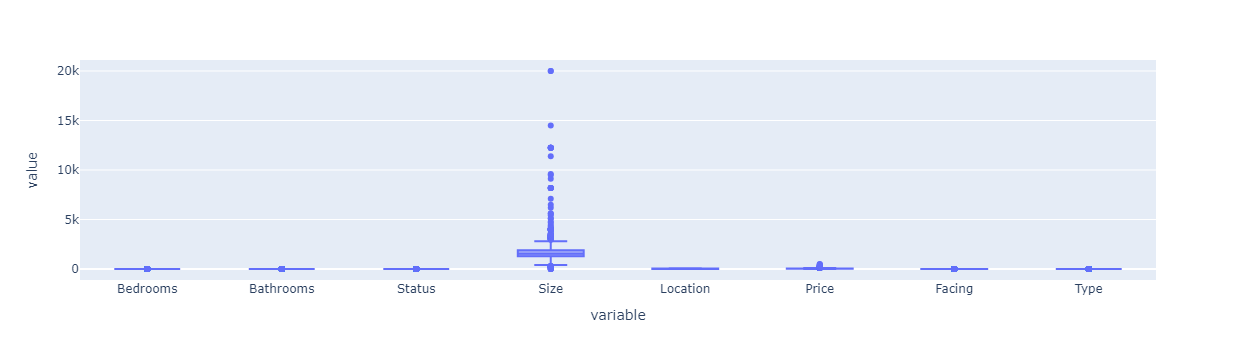

In [128]:
#Box plot -->Quartilewise Distribution
px.box(df)

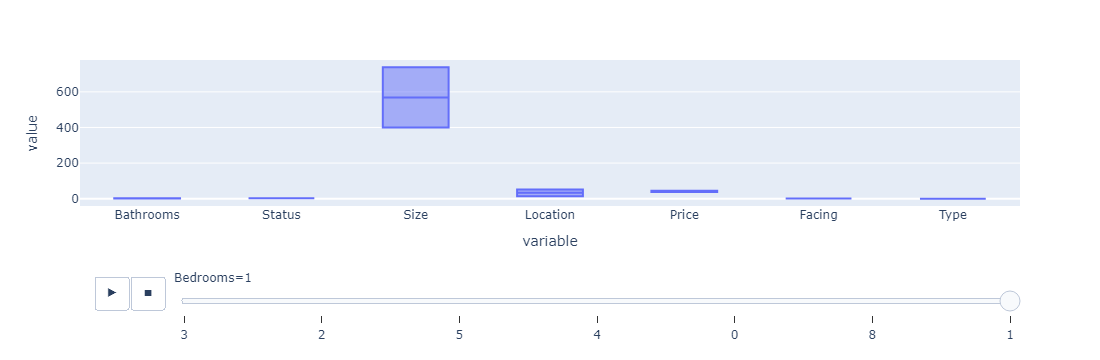

In [129]:
px.box(df,animation_frame='Bedrooms')

In [130]:
#Now in the aabove graph let us try to apply multiple colors to it
#we use color_discrete_sequence
import plotly.graph_objects as go
import pandas as pd
colors=[ 'red',
    'blue',
    'green',
    'orange',
    'purple',
    'cyan',
    'magenta',
    'yellow']
fig = go.Figure() #creating  a figure

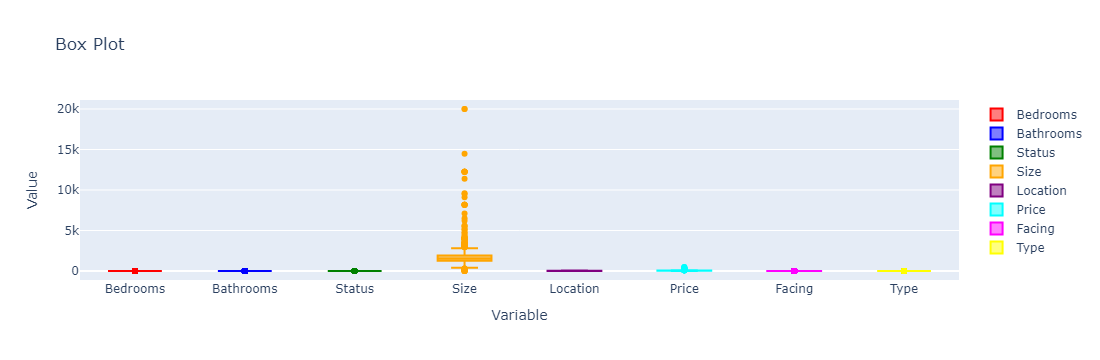

In [132]:
for i,col in enumerate(df.columns):
    fig.add_trace(go.Box(y=df[col],name=col,marker_color=colors[i]))
fig.update_layout(title="Box Plot",yaxis_title="Value",xaxis_title="Variable")
fig.show()

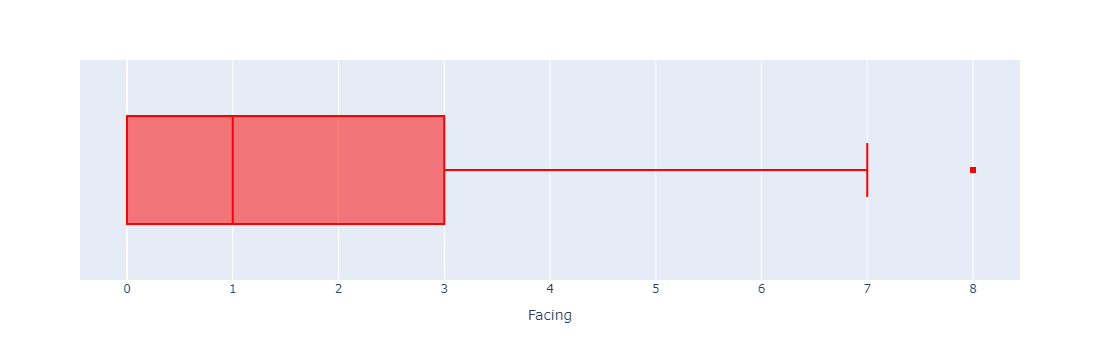

In [133]:
px.box(df,x='Facing',color_discrete_sequence=['red'])

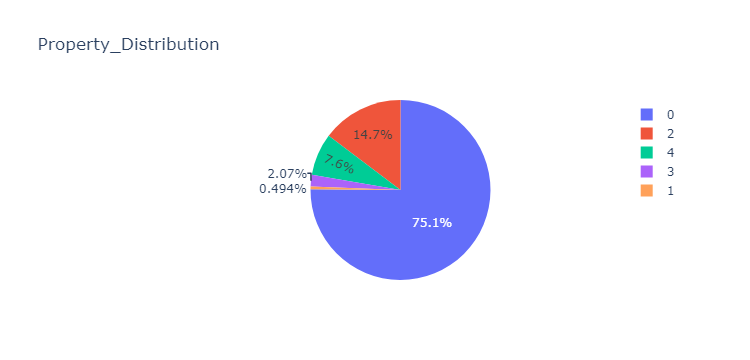

In [134]:
#let us generate pie chart by checking the majority of status
px.pie(df,names='Status',title='Property_Distribution')

In [135]:
#In similar way try out for Histograms and Bar charts

In [139]:
#Checking the Outliers--> they effect  the Modelling part
#First we will calculate the Interquartile range and findout 
#Q1,Q3 values then we will cal both lower bound and upper bound
def remove_outliers(df,threshold=3):
    """Remove Outliers"""
    #create a copy of the dataframe
    df_cleaned=df.copy()
    #First based on the threshold value
    #The Threshold value determines how far
    #from the first and third quartiles a data point must be to be considered an outlier
    for col in df_cleaned.select_dtypes(include=['int64','float64']).columns:
        Q1=df_cleaned[col].quantile(0.25) #25th percentile
        Q3=df_cleaned[col].quantile(0.75) #75th percentile
        IQR=Q3-Q1 #InterQuartile Range
        lower_bound = Q1-threshold * IQR
        upper_bound = Q3+threshold*IQR
        #once the lower bound and upper bound is calculated outliers are found
        df_cleaned = df_cleaned[
        (df_cleaned[col]>=lower_bound) & 
        (df_cleaned[col]<=upper_bound)
        ]
    return df_cleaned
d=df
final_df=remove_outliers(df)
final_df

,Bedrooms,Bathrooms,Status,Size,Location,Price,Facing,Type
17,0,0,0,1360,38,49.99,0,3
19,0,0,0,1800,38,46.00,0,3
25,0,0,0,1881,24,33.45,3,3
26,0,0,0,1360,38,48.50,0,3
27,0,0,0,1650,24,38.80,0,3
...,...,...,...,...,...,...,...,...
956,0,0,0,999,44,84.00,1,3
999,0,0,0,1350,46,15.00,0,3
1000,0,0,0,300,21,24.00,1,3
1001,0,0,0,2394,66,19.95,0,3


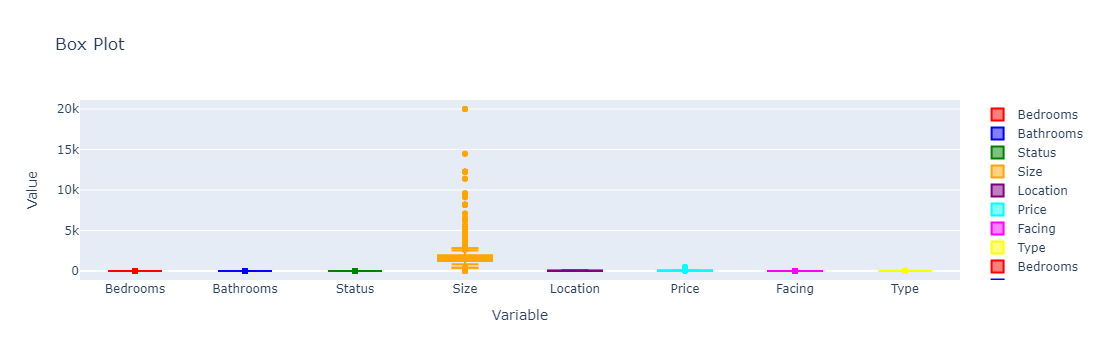

In [140]:
for i,col in enumerate(final_df.columns):
    fig.add_trace(go.Box(y=final_df[col],name=col,marker_color=colors[i]))
fig.update_layout(title="Box Plot",yaxis_title="Value",xaxis_title="Variable")
fig.show()

In [141]:
#We will use above df to build regression model 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics  import mean_squared_error,mean_absolute_error,r2_score

In [148]:
#Define the dependent and independent variables
x1 =final_df.drop('Price',axis=1)
y1= final_df['Price']

In [143]:
#first let us split the data into training and testing
import numpy as np
a,b = np.arange(5),range(5)
print(a)
print(b)

[0 1 2 3 4]
range(0, 5)


In [147]:
w,x,y,z = train_test_split(a,b,random_state=42)
print(w,x,y,z)

[2 0 3] [1 4] [2, 0, 3] [1, 4]


In [266]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.25,random_state=7)

In [267]:
len(x_train)

510

In [268]:
len(x_test)

171

In [269]:
len(y_train)

510

In [270]:
model = LinearRegression()
model

LinearRegression()

In [271]:
model.fit(x_train,y_train)

LinearRegression()

In [272]:
#then we can go for predictions
predictions = model.predict(x_test)
#predictions
#Evaluate the metrics
error_rate = mean_squared_error(y_test,predictions)
score = r2_score(y_test,predictions)
print(f'Mean Squared Error is {error_rate}')
print(f'R-squared Value is {score}')

Mean Squared Error is 144.01825099199164
R-squared Value is 0.4025692109704204


In [273]:
#Possibilities are:
#Make sure your data is properly scraped
#Once the model fitting is done check th possibilities with random_state
#Outliers should be eliminated

In [274]:
#we can go for predictions and then create a pickle file for it
#accept inputs from the user and then test

In [275]:
final_df.head()

,Bedrooms,Bathrooms,Status,Size,Location,Price,Facing,Type
17,0,0,0,1360,38,49.99,0,3
19,0,0,0,1800,38,46.00,0,3
25,0,0,0,1881,24,33.45,3,3
26,0,0,0,1360,38,48.50,0,3
27,0,0,0,1650,24,38.80,0,3


In [277]:
bed=int(input('Enter no of bedrooms:'))
bath=int(input('Enter no of bathrooms:'))
loc=int(input('Enter Location:'))
size=int(input('Enter size'))
status=int(input('Enter status:'))
facing=int(input('Enter facing:'))
typek=int(input('Enter type:'))


Enter no of bedrooms: 0
Enter no of bathrooms: 0
Enter Location: 24
Enter size 1880
Enter status: 0
Enter facing: 3
Enter type: 3


In [279]:
#we wil use above data for prediction
model.predict(np.array([[bed,bath,loc,size,status,facing,typek]]))

C:\Users\abc\Desktop\AIworkshop\teja\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([31.57031571])

In [280]:
#let us create a pickle file for final model evaluation
import pickle 

In [281]:
#we will create pickle file inorder to use the serialized modeldata instead of evaluating the model everytime --> open()
with open('House.pkl','wb') as f:
    pickle.dump(model,f)

In [282]:
#we will use pickle file to get a prediction
pred_model = pickle.load(open('House.pkl','rb'))

In [283]:
pred_model.predict(np.array([[bed,bath,loc,size,status,facing,typek]]))

C:\Users\abc\Desktop\AIworkshop\teja\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([31.57031571])